In [ ]:
import pandas as pd

df = pd.read_csv("loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("loan_data.csv")

df.columns = df.columns.str.strip()

if "Loan_ID" in df.columns:
    df.drop("Loan_ID", axis=1, inplace=True)

df["Dependents"] = df["Dependents"].replace("3+", 3)
df["Dependents"] = pd.to_numeric(df["Dependents"], errors='coerce')
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Dependents"] = df["Dependents"].astype(int)

df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)


categorical_cols = [
    "Gender", "Married", "Education",
    "Self_Employed", "Property_Area"
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

if "Loan_Status" not in df.columns:
    df["Loan_Status"] = df["Credit_History"]

df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

predictions = model.predict(X)

print("Predictions (0 = No, 1 = Yes):")
print(predictions)

Predictions (0 = No, 1 = Yes):
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


c:\Users\Puspal\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("loan_data.csv")

df.columns = df.columns.str.strip()

if "Loan_ID" in df.columns:
    df.drop("Loan_ID", axis=1, inplace=True)

df["Dependents"] = df["Dependents"].replace("3+", 3)
df["Dependents"] = pd.to_numeric(df["Dependents"], errors='coerce')
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Dependents"] = df["Dependents"].astype(int)

df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)

categorical_cols = [
    "Gender", "Married", "Education",
    "Self_Employed", "Property_Area"
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

if "Loan_Status" not in df.columns:
    df["Loan_Status"] = df["Credit_History"]

df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        55

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



c:\Users\Puspal\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


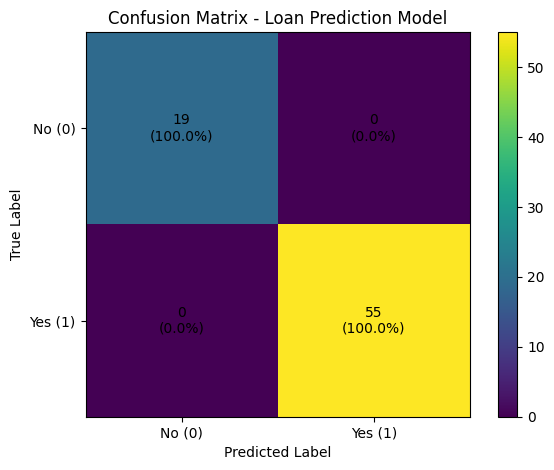

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Loan Prediction Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["No (0)", "Yes (1)"])
plt.yticks([0, 1], ["No (0)", "Yes (1)"])

plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cm[i, j]}\n({cm_percent[i, j]*100:.1f}%)",
            ha="center",
            va="center"
        )

plt.tight_layout()
plt.show()


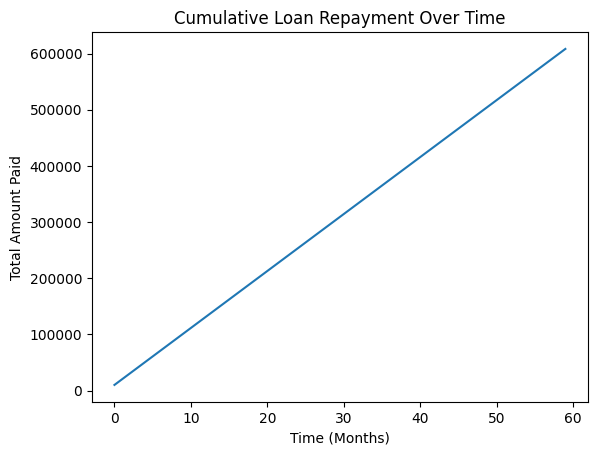

Annual Interest Rate: 8 % per annum
Monthly EMI: 10138.2
Total Repayment: 608291.83


In [ ]:
import matplotlib.pyplot as plt

loan_amount = 500000              
annual_interest_rate = 8          
years = 5                         

months = years * 12
monthly_rate = annual_interest_rate / 12 / 100

emi = (loan_amount * monthly_rate * (1 + monthly_rate)**months) / \
      ((1 + monthly_rate)**months - 1)

cumulative_paid = []
total_paid = 0

for m in range(months):
    total_paid += emi
    cumulative_paid.append(total_paid)

plt.figure()
plt.plot(range(months), cumulative_paid)
plt.xlabel("Time (Months)")
plt.ylabel("Total Amount Paid")
plt.title("Cumulative Loan Repayment Over Time")
plt.show()

print("Annual Interest Rate:", annual_interest_rate, "% per annum")
print("Monthly EMI:", round(emi, 2))
print("Total Repayment:", round(cumulative_paid[-1], 2))


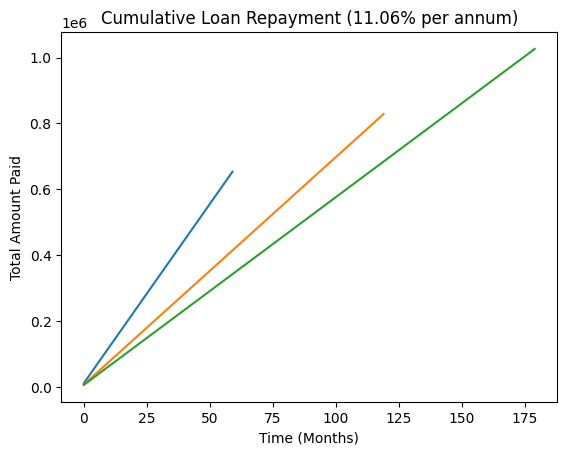

5 Years Plan
Monthly EMI: 10886.18
Total Repayment: 653170.73

10 Years Plan
Monthly EMI: 6904.49
Total Repayment: 828539.18

15 Years Plan
Monthly EMI: 5701.84
Total Repayment: 1026330.67



In [ ]:
import matplotlib.pyplot as plt

loan_amount = 500000
annual_interest_rate = 11.06
years_list = [5, 10, 15]

def cumulative_payment_curve(principal, annual_rate, years):
    months = years * 12
    monthly_rate = annual_rate / 12 / 100
    
    emi = (principal * monthly_rate * (1 + monthly_rate)**months) / \
          ((1 + monthly_rate)**months - 1)
    
    cumulative_paid = []
    total_paid = 0
    
    for _ in range(months):
        total_paid += emi
        cumulative_paid.append(total_paid)
    
    return cumulative_paid, emi, months

plt.figure()

for years in years_list:
    curve, emi, months = cumulative_payment_curve(
        loan_amount, annual_interest_rate, years
    )
    plt.plot(range(months), curve)

plt.xlabel("Time (Months)")
plt.ylabel("Total Amount Paid")
plt.title("Cumulative Loan Repayment (11.06% per annum)")
plt.show()

for years in years_list:
    curve, emi, months = cumulative_payment_curve(
        loan_amount, annual_interest_rate, years
    )
    print(f"{years} Years Plan")
    print("Monthly EMI:", round(emi, 2))
    print("Total Repayment:", round(curve[-1], 2))
    print()


In [20]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully")


Model saved successfully
